In [ ]:
import pandas as pd
data=pd.read_csv('titanic.csv')
print(data.info())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


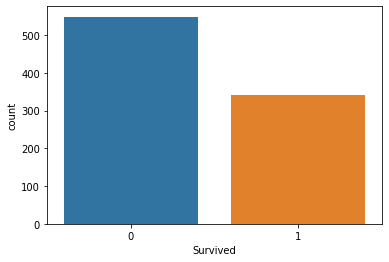

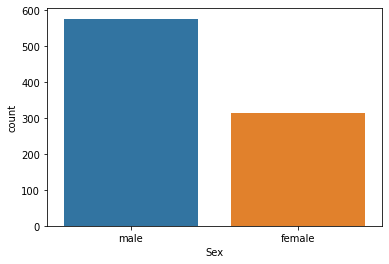

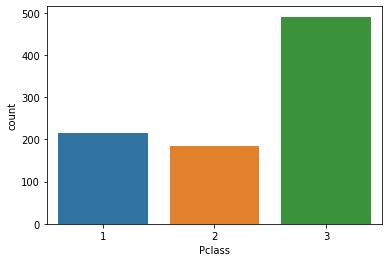

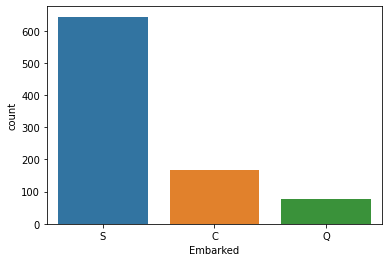

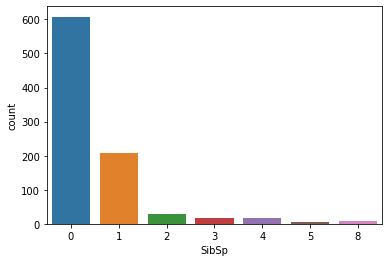

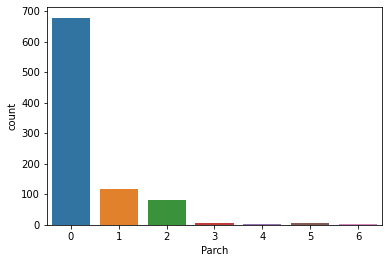

In [ ]:
#visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
def count_plot(feature):    
    sns.countplot(x=feature,data=data)
    plt.show()
    print("\n\n")
    
categories = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for x in categories:
    count_plot(x)

In [ ]:
#cleaning data
data.drop(["PassengerId","Ticket","Cabin","Name"],axis=1,inplace=True)
data.dropna(inplace=True)
data.isnull().sum()
data.head

<bound method NDFrame.head of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
885         0       3  female  39.0      0      5  29.1250        Q
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[712 rows x 8 columns]>

In [ ]:
x=data[['Pclass','Sex','Age','SibSp','Parch']]
y=data['Survived']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Sex']=le.fit_transform(x['Sex'])
print(x.head())

   Pclass  Sex   Age  SibSp  Parch
0       3    1  22.0      1      0
1       1    0  38.0      1      0
2       3    0  26.0      0      0
3       1    0  35.0      1      0
4       3    1  35.0      0      0


<ipython-input-22-3208d944088a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Sex']=le.fit_transform(x['Sex'])


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.95,random_state=0)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
y_pred=model.predict(x_test)
print(y_pred)
print(y_test.values)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1]
[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0]


In [ ]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
prc=metrics.precision_score(y_test,y_pred,pos_label='positive',average='micro')
print(acc)
print(prc)

0.8333333333333334
0.8333333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
